# Machine Learning SoSe21 Practice Class

Dr. Timo Baumann, Dr. Özge Alaçam, Björn Sygo <br>
Email: baumann@informatik.uni-hamburg.de, alacam@informatik.uni-hamburg.de, 6sygo@informatik.uni-hamburg.de

## Exercise 2
**Description:** Implement logistic regression with a gradient descent <br>
**Deadline:** Saturday, 1. May 2021, 23:59 <br>
**Working together:** You can work in pairs or triples but no larger teams are allowed. <br>
&emsp;&emsp;&emsp; &emsp; &emsp; &emsp; &emsp; Please adhere to the honor code discussed in class. <br>
&emsp;&emsp;&emsp; &emsp; &emsp; &emsp; &emsp; All members of the team must get involved in understanding and coding the solution.

## Submission: 
**Linus Geewe, Christoph Brauer, Moritz Lahann**


### Goal

1. The goal is to find the parameters of a decision boundary function<br>
$z=\theta_0 + \theta_1x_1 + \theta_2x_2$ with parameters $\theta_0$, $\theta_1$, $\theta_2$ <br>
that differentiates the positive examples from the negative examples in the provided data. (Note that you do not need to use higher-order polynomials this time.)

2. Each data point will be evaluated by using the sigmoid function $g(\mathbf{x})=\frac{1}{1+e^{-z}}$ <br>
to find whether it is a positive or negative example.

3. During training, the sigmoid function determines the loss of the model wrt. the data and you can use gradient descent as in the previous exercise.

4. The decision boundary can be plotted using the function<br>
$x_2=(\theta_0 + \theta_1x_1)(-\frac{1}{\theta_2})$ <br>
(i.e., solving the formula above for $x_2$).

### Load the data

**Task 1** (10%): Read the provided datafile `data.txt`, load the data into appropriate data structures, and visualize it (using different colors for each class).

The dataset in "data.txt" contains 100 lines of datapoints.

Each row contains the coordinates for each point in 2 dimension $(x_1 \text{ and } x_2)$
as well as a label if it is a positive (label 1) or a negative (label 0) example.
These 3 values are separated by whitespace.
Your plot should look like this: <br>
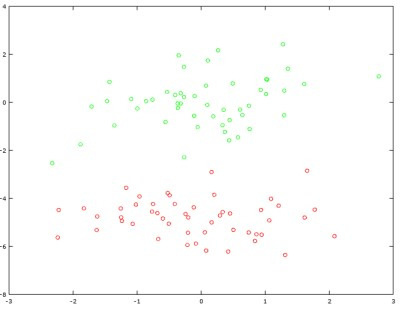

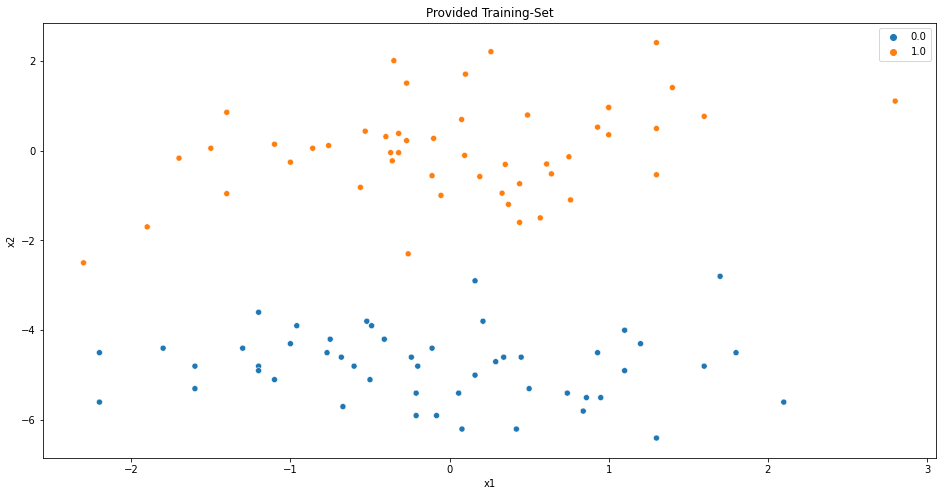

In [2]:
import numpy as np
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]


data = np.loadtxt("data.txt", delimiter=" ")

sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=data[:, 2])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title ('Provided Training-Set')
plt.show ()


### Define your classification model

**Task 2** (30%): Define the classifier that assesses a data point wrt. the decision boundary using the sigmoid function.

Define the paramters $\theta$ of your model and initialize them with random values in the interval (-0.01,0.01).

In [3]:
# set theta_0, theta_1, theta_2 to random values
def initialize_parameters(degrees):
    return [random.uniform(-0.01, 0.01) for _ in range(degrees)]

# hypothesis is now a sigmoid function
def hypothesis(x1, x2, thetas):
    z = thetas[0] + thetas[1] * x1 + thetas[2] * x2
    return 1 / (1 + math.exp(-z))

starting_thetas = initialize_parameters(3)
# print(starting_thetas)

# print(hypothesis(data[0, 0], data[0, 1], starting_thetas))
# print(data[0, 2])
# print(f"loss = {data[0, 2] - hypothesis(data[0, 0], data[0, 1], starting_thetas)}")

### Logistic Regression

**Task 3** (30%): Implement the Logistic Regression algorithm using Gradient Descent, so that you classify correctly both types of data.

Hint: We find that a learning rate of $\alpha=.01$ and using 100 iterations over the full data lead to good results.

In [4]:
learning_rate = 0.01
nr_epochs = 100

def mean_loss(data, thetas):
    losses = []
    for sample in data:
        losses.append(sample[2] - hypothesis(sample[0], sample[1], thetas))
    return sum(losses) / len(losses)

def accuracy(data, thetas):
    correct = 0
    for sample in data:
        if(round(hypothesis(sample[0], sample[1], thetas)) == sample[2]):
            correct += 1
    return correct / data.shape[0]

def f_score(data, thetas):
    true_positive = 0
    false_positive = 0
    false_negative = 0
    for sample in data:
        prediction = round(hypothesis(sample[0], sample[1], thetas))
        if prediction == 1:
            if sample[2] == prediction:
                true_positive += 1
            else:
                false_positive += 1
        else:
            if sample[2] != prediction:
                false_negative += 1

    return true_positive / (true_positive + ((1/2) * (false_positive + false_negative)))

# update theta js
def update_step(sample, learning_rate, thetas):
    x1 = sample[0]
    x2 = sample[1]
    y = sample[2]
    return [
        thetas[0] + learning_rate * (y - hypothesis(x1, x2, thetas)) * 1,
        thetas[1] + learning_rate * (y - hypothesis(x1, x2, thetas)) * x1,
        thetas[2] + learning_rate * (y - hypothesis(x1, x2, thetas)) * x2]
    
# actual learning and error collection
def training_loop(data, learning_rate, nr_epochs, starting_thetas):
    thetas = starting_thetas
    f_scores = []
    accuracies = []
    mean_losses = []
    for _ in range(nr_epochs):
        for sample in data:
            thetas = update_step(sample, learning_rate, thetas)
        f_scores.append(f_score(data, thetas))
        accuracies.append(accuracy(data, thetas))
        mean_losses.append(mean_loss(data, thetas))
    return thetas, f_scores, accuracies, mean_losses

In [5]:
starting_thetas = initialize_parameters(3)

final_thetas, f_scores, accuracies, mean_losses = training_loop(data, learning_rate, nr_epochs, starting_thetas)

print ( f"Initial thetas : {starting_thetas}")
print ( f"final_thetas : {final_thetas}")

Initial thetas : [-0.0022936409788744047, -0.008999565263865732, -0.00683466260610252]
final_thetas : [4.228902200050224, -0.5167113599175747, 1.9205311947720658]


### Train the model and visualize results

**Task 4** (15%): Train your model using the provided data.

Plot your results. Your plot should contain: 

1. The datapoints colored in one of two colors. Each color should represent one of the two classes.
2. Your initial model's decision boundary before training
3. Your model's decision boundary after training


The solution should look like the following plot, where the blue line could be the initial model
(based on random parameters) and the black line is the final answer, after 100 iterations.

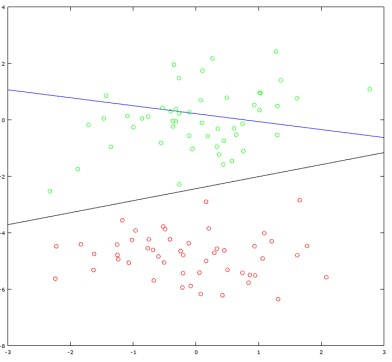

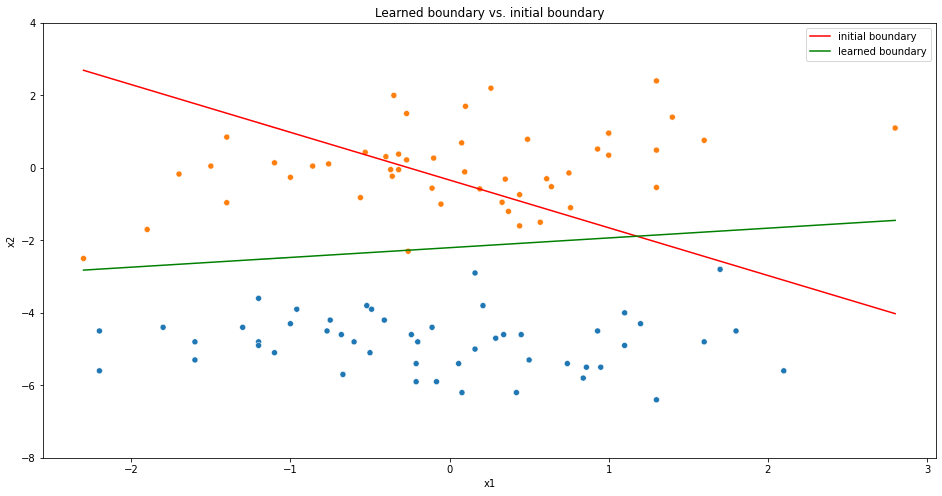

In [11]:
def decision_boundary_plotter (x1, thetas):
    return (thetas[0] + thetas[1] * x1) * (-1 / thetas[2])


# plot data
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=data[:, 2])

# plot initial decision boundary
sns.lineplot(x=data[:, 0], y=[decision_boundary_plotter(x, starting_thetas) for x in data[:, 0]], color="red")

# plot learned decision boundary
sns.lineplot(x=data[:, 0], y=[decision_boundary_plotter(x, final_thetas) for x in data[:, 0]], color="green")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title ("Learned boundary vs. initial boundary")
plt.legend(["initial boundary", "learned boundary"])
plt.ylim((-8, 4))
plt.show()



### Assessing the classification performance

**Task 5** (15%): Implement performance metrics (loss, accuracy, F-score) and plot them over the course of training iterations.

1. The *average training loss* is a good indicator of whether your model has or still is converging. Take the mean of the cost function (also called loss function) for each training sample in the iteration.

2. The model's *accuracy* is the proportion of data points assigned to the correct class (in the current iteration).

3. Accuracy is a great metric for balanced cases (when the number of evaluation examples is similar for all classes and you are similarly interested in the class outcomes). However, in a balanced two-class problem, simply guessing already achieves an accuracy of 50% (prove this for yourself!), as does a fixed assignment of all data to one of the classes (prove this for yourself as well!). <br>
*F-score* is stricter. Read-up on f-score (e.g. at https://en.wikipedia.org/wiki/F-score), implement it and plot it over your iterations.

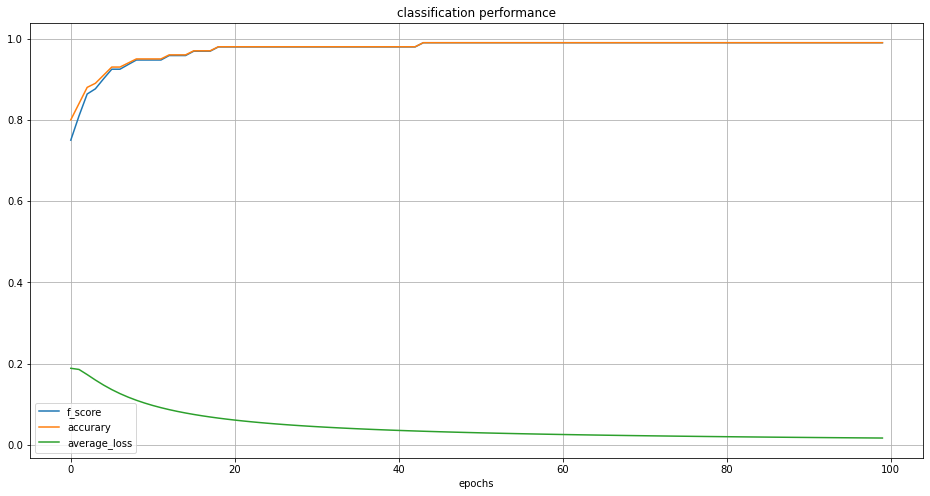

In [7]:
plt.title ('classification performance')
plt.xlabel ('epochs')
plt.grid ()
sns.lineplot(x=np.arange(0, nr_epochs), y=f_scores)
sns.lineplot(x=np.arange(0, nr_epochs), y=accuracies)
sns.lineplot(x=np.arange(0, nr_epochs), y=mean_losses)
plt.legend(["f_score", "accurary", "average_loss"])
plt.show()

### Report Submission

Prepare a report of your solution as a commented Jupyter notebook (using markdown for your results and comments); include figures and results.
If you must, you can also upload a PDF document with the report annexed with your Python code.

Upload your report file to the Machine Learning Moodle Course page. Please make sure that your submission team corresponds to the team's Moodle group that you're in.